In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
from glob import glob
from google.colab import drive
from keras.models import Sequential
from PIL import Image
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Dropout,BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adagrad
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import auc


drive.mount('/content/drive')

file_name = '/content/drive/My Drive/Final Project DL & ML/chest-xray.zip'

with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()  # Extract all contents of the ZIP file.
  print('Done')

train_path = '/content/chest_xray/chest_xray/train'
val_path = '/content/chest_xray/chest_xray/val'
test_path = '/content/chest_xray/chest_xray/test'

pre_path = '/content/chest_xray/chest_xray/'


# Define paths for different sets and classes.
train_normal_dir = pre_path + 'train/NORMAL/'
train_pneu_dir = pre_path + 'train/PNEUMONIA/'

test_normal_dir = pre_path + 'test/NORMAL/'
test_pneu_dir = pre_path + 'test/PNEUMONIA/'

val_normal_dir = pre_path + 'val/NORMAL/'
val_pneu_dir = pre_path + 'val/PNEUMONIA/'


#initiliazing the healthy, bacteria and virus cases of the images
virus = [] #1493 images total
bacteria = [] #2780 images total
healthy = [] #1583 images total

healthy += glob(train_normal_dir + '*jpeg')

#By using Regular Expressions we sorting the cases properly
#0- healthy, 1- virus case, 2 - bacteria case
for i in os.listdir(train_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([train_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([train_pneu_dir+i,2])

healthy += glob(test_normal_dir + '*jpeg')

for i in os.listdir(test_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([test_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([test_pneu_dir+i,2])

healthy += glob(val_normal_dir + '*jpeg')

for i in os.listdir(val_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([val_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([val_pneu_dir+i,2])

for i in range(len(healthy)):
  healthy[i]=(healthy[i],0)

for lst in [healthy,virus,bacteria]:
  random.shuffle(lst)

# print(len(healthy))
# print(len(virus))
# print(len(bacteria))

# """# Creating the test, train and validation sets"""
# # 15% validation(878) and 20% test sets(1172), 65% train set from all data(3806)
# # Splitting data into train, validation, and test sets

val = virus[:250] + bacteria[:450] + healthy[:178]
test = virus[250:500] + bacteria[450:900] + healthy[178:650]
train = virus[500:] + bacteria[900:] + healthy[650:]


def NormalPixels_Labels(data):
    # normalizing the pixels i=on every image and label
    normal = []
    labels = []
    for im_path, label in data:
        if label == 2:
           #works only for Q1
            labels.append(1)
        else:
            labels.append(label)
        image = Image.open(im_path)  # Open image
        image = image.convert("L")   # Convert to grayscale
        resized_image = image.resize((180,180))  # Resize the image
        image_array = np.array(resized_image)  # Convert to NumPy array
        im_normal = image_array / 255.0  # Normalize pixel values
        normal.append(im_normal)
    return np.array(normal), np.array(labels)


def CreatingtVal(val):
    val_norm, val_label = NormalPixels_Labels(val)  # Normalize validation data
    return val_norm, val_label

def CreatingtTrain(train):
    train_norm, train_label = NormalPixels_Labels(train)  # Normalize training data
    return train_norm, train_label

def CreatingtTest(test):
    test_norm, test_label = NormalPixels_Labels(test)  # Normalize test data
    return test_norm, test_label


# Load and preprocess the data
val_norm, val_label = CreatingtVal(val)
train_norm, train_label = CreatingtTrain(train)
test_norm, test_label = CreatingtTest(test)






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Done


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,001 (1.77 MB)

 Trainable params: 464,001 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7457 - loss: 0.5853 - val_accuracy: 0.7973 - val_loss: 0.5181
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7603 - loss: 0.5462 - val_accuracy: 0.7973 - val_loss: 0.5317
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7641 - loss: 0.4981 - val_accuracy: 0.8144 - val_loss: 0.3568
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8826 - loss: 0.2935 - val_accuracy: 0.9009 - val_loss: 0.2362
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9131 - loss: 0.2109 - val_accuracy: 0.9442 - val_loss: 0.1865
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9343 - loss: 0.1799 - val_accuracy: 0.9465 - val_loss: 0.1782
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9320 - loss: 0.1832 - val_accuracy: 0.9431 - val_loss: 0.1633
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9360 - loss: 0.1598 - val_ac

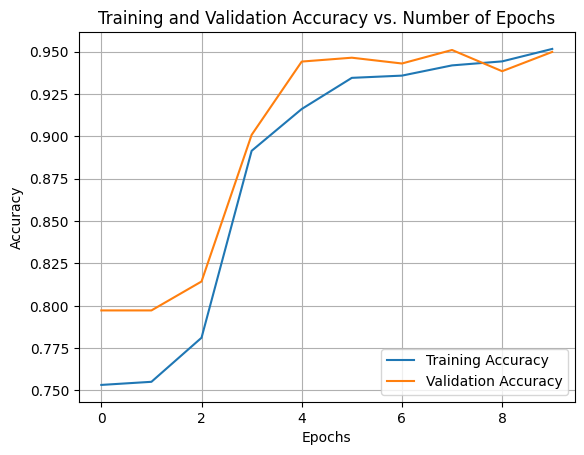

In [12]:
# Build the model
CNN = models.Sequential()

CNN.add(layers.Conv2D(32, (3, 3), padding = 'same' ,activation='relu', input_shape=(180, 180, 1)))
CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
CNN.add(Dropout(0.1))

CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
CNN.add(layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
CNN.add(Dropout(0.2))

CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
CNN.add(layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
CNN.add(Dropout(0.3))

CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

CNN.add(layers.Flatten())
CNN.add(Dropout(0.3))
CNN.add(layers.Dense(1, activation = 'sigmoid'))

# Compile the model
CNN.compile(optimizer = Adagrad(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

CNN.summary()

history = CNN.fit(train_norm, train_label, epochs = 10, batch_size = 20,validation_data=(val_norm, val_label), verbose=1)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

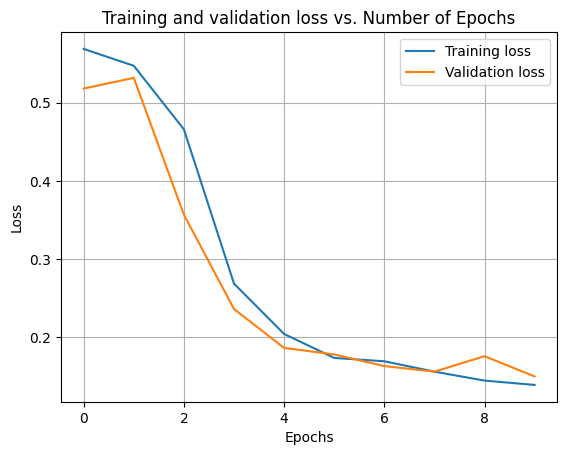

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9487 - loss: 0.1389

Test accuracy:  0.9436860084533691

Test loss:  0.16316165030002594


In [13]:
plt.clf() # clear figure
plt.plot(history.history['loss'], label='Training loss')

plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')
plt.show()

test_loss, test_acc = CNN.evaluate(test_norm, test_label, verbose=1)
print("\nTest accuracy: ", test_acc)
print("\nTest loss: ", test_loss)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


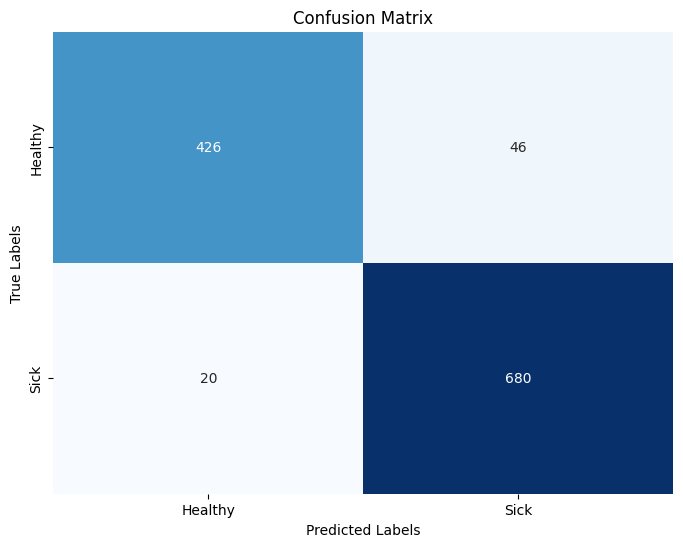

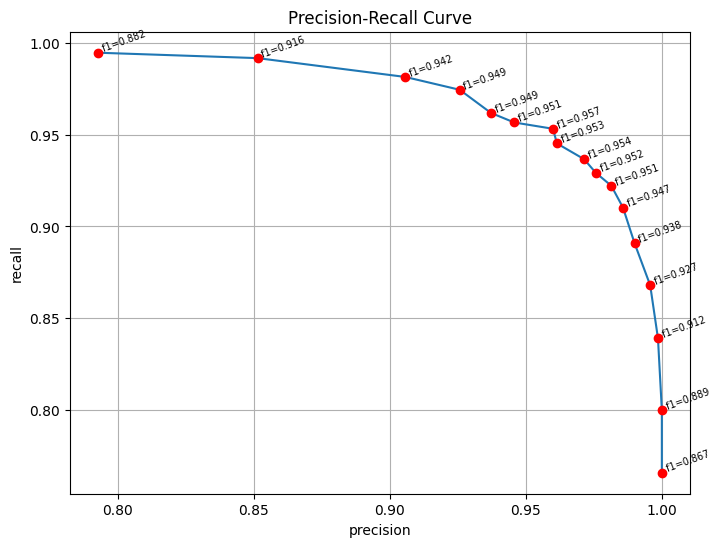

The best F1 score is 0.957 with threshold of 0.6


In [15]:
# Get the predicted probabilities for the test set
predicted_probabilities = CNN.predict(test_norm)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_label, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# Set labels for the axes
plt.xticks(ticks=[0.5, 1.5], labels=['Healthy', 'Sick'])
plt.yticks(ticks=[0.5, 1.5], labels=['Healthy', 'Sick'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

precision, recall, _ = precision_recall_curve(test_label,predicted_labels)
precision_values = []
recall_values = []
f1_values = []

# Compute precision, recall, and threshold values for different thresholds
for threshold in np.arange(0.1, 0.95, 0.05):
    # Apply threshold to predicted probabilities
    predicted_labels = (predicted_probabilities > threshold)
    # Compute precision and recall
    precision = precision_score(test_label, predicted_labels)
    recall = recall_score(test_label, predicted_labels)
    f1 = f1_score(test_label, predicted_labels)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values,recall_values,precision_values,'ro')
for i in range(len(precision_values)):
  plt.text(recall_values[i],precision_values[i],f' f1={f1_values[i]:.3}',fontsize = 7, rotation = 20)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
# Get the maximum number in the list
max_f1 = max(f1_values)

# Get the index of the maximum number
max_index = f1_values.index(max_f1)

threshold = 0.1+0.05*(max_index)

print(f"The best F1 score is {max_f1:.3} with threshold of {threshold:.2}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')